In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [18]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [19]:
x=data.data
y=data.target

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [22]:
L.fit(x_train,y_train)

LinearRegression()

In [23]:
print(L.coef_)
print(L.intercept_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
151.34560453985995


In [24]:
y_pred = L.predict(x_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score ",r2_score(y_test,y_pred))
print("RMSE ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score  0.4526027629719195
RMSE  53.85344583676593


**Ridge**

In [51]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.1)


In [52]:
R.fit(x_train,y_train)

Ridge(alpha=0.1)

In [53]:
print(R.coef_)
print(R.intercept_)

[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
151.45857456679613


In [54]:
y_pred1 = R.predict(x_test)

In [55]:
print("R2 score ",r2_score(y_test,y_pred1))
print("RMSE ",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score  0.46085219464119265
RMSE  53.446111997699646


**Example**

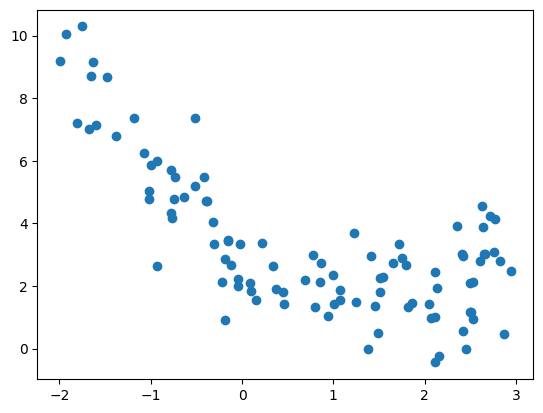

In [56]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

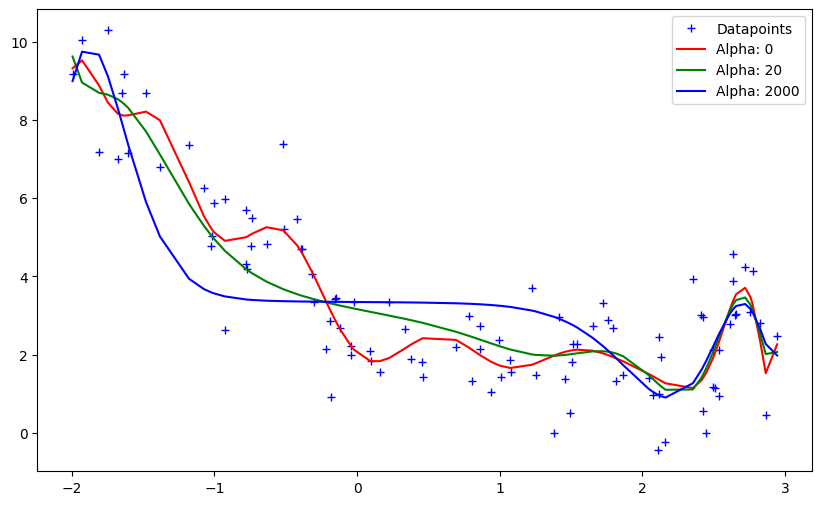

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 2000]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()